# Practice Querying the Snowexsql Database

In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt 
import datetime

#database imports
from snowexsql.db import get_db
from snowexsql.data import SiteData, ImageData, LayerData, PointData
from snowexsql.conversions import query_to_geopandas

In [2]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)
print('snowexsql database successfully loaded')

snowexsql database successfully loaded


In [ ]:
# Great for debugging especially when trying different queries
# session.rollback()

## Snow Pits --> _LayerData_ & _SiteData_ in the snowexsql database
### Example 1: 
Let's find all the pits that overlap with UAVSAR data

#### 1a). Unsure of the fly over date, but know which instrument you'd like to overlap with, here's how:

In [3]:
# Form on the Images table that returns Raster collection dates
qry = session.query(ImageData.date)

# Filter for UAVSAR data
qry = qry.filter(ImageData.surveyors == 'UAVSAR team, JPL')

# Grab the unique dates
qry = qry.distinct()
qry
# Execute the query 
dates = qry.all() 

# Clean up the dates to remove the tuple
dates = [d[0] for d in dates] 
print('UAVSAR flight dates are: ', dates)

# Find all the snow pits done on these days and return a geopandas df
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date.in_(dates))
df = query_to_geopandas(qry, engine)
df.head()

# Close your session to avoid hanging transactions
session.close()

UAVSAR flight dates are:  [datetime.date(2020, 1, 31), datetime.date(2020, 2, 12)]


#### 1b). Want to select an exact flight date match? Here's how:

In [4]:
# Pick a day from the list of dates
dt = dates[0] 

# Find all the snow pits done on these days and return a geopandas df
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date == dt)
df_exact = query_to_geopandas(qry, engine)
df_exact.head()

,geom,site_id,date
0,POINT (740652.000 4327445.000),2C2,2020-01-31
1,POINT (744396.000 4323540.000),8C26,2020-01-31
2,POINT (741960.000 4326644.000),6C10,2020-01-31
3,POINT (741493.000 4326833.000),1C8,2020-01-31
4,POINT (745340.000 4322754.000),8S28,2020-01-31


#### 1c). Want to select a range of dates near the flight date? Here's how:

In [5]:
# Form a date range to query on either side of our chosen day 
date_range = [dt + i * datetime.timedelta(days=1) for i in [-1, 0, 1]]

# Find all the snow pits done on these days and return a geopandas df
qry = session.query(SiteData.geom, SiteData.site_id, SiteData.date)
qry = qry.filter(SiteData.date.in_(date_range))
df_range = query_to_geopandas(qry, engine)
df_range

,geom,site_id,date
0,POINT (744561.000 4322721.000),5S21,2020-02-01
1,POINT (746228.000 4322671.000),9S39,2020-02-01
2,POINT (745937.000 4322754.000),2S37,2020-02-01
3,POINT (746546.000 4324066.000),8N45,2020-02-01
4,POINT (746350.000 4321976.000),6C34,2020-02-01
5,POINT (746149.000 4322488.000),3S38,2020-02-01
6,POINT (743652.000 4322680.000),3S14,2020-02-01
7,POINT (747055.000 4323916.000),5N50,2020-02-01
8,POINT (746553.000 4323759.000),6N46,2020-02-01
9,POINT (746303.000 4322571.000),9S40,2020-02-01


#### 1d). Have a known date in mind that you wish to select, here's how:

In [6]:
# Find all the data that was collected on 2-12-2020
dt = datetime.date(2020, 2, 12)

# Grab all Point data instruments from our date
point_instruments = session.query(PointData.instrument).filter(PointData.date == dt).distinct().all()
print('Point Data are: \n', point_instruments)

# Grab all Layer data instruments from our date
layer_instruments = session.query(LayerData.instrument, LayerData.type).filter(LayerData.date == dt).distinct().all()
print('Layer Data are: \n', layer_instruments)

# Grab all Image data instruments from our date
image_instruments = session.query(ImageData.instrument).filter(ImageData.date == dt).distinct().all()
print('Image Data are: \n', image_instruments)

qry = session.query(PointData.geom, PointData.instrument, PointData.site_id, PointData.date)
qry = qry.filter(PointData.date == dt) 
df = query_to_geopandas(qry, engine)
df

Point Data are: 
 [('camera-trap',), ('magnaprobe',), ('pit ruler',)]
Layer Data are: 
 [('IRIS', 'equivalent_diameter'), ('IRIS', 'reflectance'), ('IRIS', 'sample_signal'), ('IRIS', 'specific_surface_area'), ('IS3-SP-11-01F', 'equivalent_diameter'), ('IS3-SP-11-01F', 'reflectance'), ('IS3-SP-11-01F', 'sample_signal'), ('IS3-SP-11-01F', 'specific_surface_area'), ('snowmicropen', 'force'), (None, 'density'), (None, 'grain_size'), (None, 'grain_type'), (None, 'hand_hardness'), (None, 'lwc_vol'), (None, 'manual_wetness'), (None, 'permittivity'), (None, 'temperature')]
Image Data are: 
 [('UAVSAR, L-band InSAR',)]


,geom,instrument,site_id,date
0,POINT (769735.347 4332902.516),camera-trap,None,2020-02-12
1,POINT (768027.662 4332519.266),camera-trap,None,2020-02-12
2,POINT (768027.662 4332519.266),camera-trap,None,2020-02-12
3,POINT (768027.662 4332519.266),camera-trap,None,2020-02-12
4,POINT (771338.607 4332280.166),camera-trap,None,2020-02-12
...,...,...,...,...
1569,POINT (742223.910 4326424.260),magnaprobe,None,2020-02-12
1570,POINT (742225.570 4326426.530),magnaprobe,None,2020-02-12
1571,POINT (742229.900 4326426.670),magnaprobe,None,2020-02-12
1572,POINT (742232.530 4326425.640),magnaprobe,None,2020-02-12


### Your turn
#### try this: query for a different airborne instrument (hint: airborne lidar--> 'ASO Inc.')

### Nice work, almost done here!

## Classify pit data based on the depth and vegetation matrix
### Example 2: 

#### 2a).Distinguish pits by vegetation coverage: 
- treeless (0% tree cover)
- sparse (1-30% tree cover)
- dense (31-100% tree cover)

*vegetation classes assigned based on optical imagery: tree density map, Nov. 2010 WorldView-2 Imagery

In [ ]:
def parse_veg_class(site_id):
    
    # Classifying by vegetation coverage 
    veg_class = {'treeless':[1, 2, 3], 'sparse':[4, 5, 6], 'dense':[7, 8, 9]}
   
    vclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric():
        class_id = int(class_id)

        for k,v in veg_class.items():

            if class_id in v:
                vclass = k 
                
    return vclass 

#### 2b). Distinguish pits by snow depth classes: 
- shallow (<90cm)
- medium (90-122cm)
- deep (>122cm)

*depth classes assigned based on 2017 snow depth lidar data

In [ ]:
def parse_depth_class(site_id):
    # Classifying by expected depth 
    depth_class = {'shallow':[1, 4, 7], 'medium':[2, 5, 8], 'deep':[3, 6, 9]} 
   
    dclass = None 
    
    class_id = site_id[0]
    
    if class_id.isnumeric(): #for the outlier TS site
        class_id = int(class_id) #cast as integer

        for k,v in depth_class.items(): #for the key, value pairs in the dict listed above:

            if class_id in v:
                dclass = k 

    return dclass 

In [ ]:
# load the database
db_name = 'snow:hackweek@52.32.183.144/snowex'
engine, session = get_db(db_name)

result = session.query(LayerData.type).distinct().all()

qry = session.query(LayerData).filter(LayerData.type=='density')

# Form our dataframe from the query 
df = query_to_geopandas(qry, engine)
df['value'] = df['value'].astype(float) #cast the value as a float (they are strings)
 
# parse snow pit data by the veg/depth matrix
df['veg_class'] = [parse_veg_class(i) for i in df['site_id']] #run the parse_veg function for every site_id
df['depth_class'] = [parse_depth_class(i) for i in df['site_id']] #run the parse_depth funciton for every site_id

# # Show off our df 
# df.plot()

df.columns
col_list = ['site_name', 'date', 'id', 'instrument', 'type', 'units', 'surveyors', 'latitude',
       'longitude', 'geom','depth', 'site_id', 'value', 'veg_class', 'depth_class']
df = df[col_list]
df

In [ ]:
df.depth

In [ ]:
# These are all of the unique site ids 
len(df['site_id'].unique())

In [ ]:
#make df with only 153 rows using site_id.unique
gb = df.groupby(['site_id', 'veg_class'])
#gb = df.groupby('site_id')
gb['site_name'].count().groupby("veg_class").count()


In [ ]:
# d = df[['veg_class', 'depth_class']].groupby(df['site_id']).groups
# gb = df.groupby(['veg_class', 'site_id']).count()
# gb = df.groupby(['site_id']).count()
df['veg_class'].groupby('veg_class').count()

# print(gb)

In [ ]:
df['site_id'].unique().groupby('veg_class').count()

In [ ]:
df[['veg_class', 'site_id']].groupby('veg_class').count() #table I like!

### EXTRA EXAMPLE, REMOVE, but save code first... 
grab all pits based on flight line pattern

1). only want to analyize pits from the 'N' flight line?

2). what about the 'N' flight line for a 1 week period?

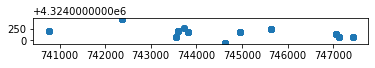

In [8]:
# Grab density
session.rollback()

q = session.query(LayerData).filter(LayerData.type == 'density').filter(LayerData.site_id.contains('N')).limit(100)
df = query_to_geopandas(q, engine)
# Convert density to float
df['value'] = df['value'].astype(float)

df 

df.plot()
plt.show()

# Calculate SWE
# swe_lambda = lambda row: row['value'] * (row['depth'] - row['bottom_depth']) / 100
# df['swe'] = df.apply(swe_lambda, axis=1)